In [1]:
#Install pyupset to generate a visual representation of the "interactions" between datasets 

!pip install pyupset

In [34]:
#Import pyupset and dependencies 

import pyupset as pyu
import matplotlib as mpl
import matplotlib.pyplot as plt
from pickle import load
import pandas as pd
%matplotlib inline

In [88]:
# Read in prokka output summaries in tsv format 
df1=pd.read_table('/Users/philliptbrooks/Documents/dahak_project/public/dahak/workflows/functional_inference/prokka_annotation_megahit/podar_metaG_100.tsv', delimiter = "\t")
df2=pd.read_table('/Users/philliptbrooks/Documents/dahak_project/public/dahak/workflows/functional_inference/prokka_annotation_spades/podar_metaG_sub_100.tsv', delimiter = "\t")
df3=pd.read_table('/Users/philliptbrooks/Documents/dahak_project/public/dahak/workflows/functional_inference/prokka_annotation_megahit/podar_metaG_50.tsv', delimiter = "\t")
df4=pd.read_table('/Users/philliptbrooks/Documents/dahak_project/public/dahak/workflows/functional_inference/prokka_annotation_spades/podar_metaG_sub_50.tsv', delimiter = "\t")
#df5=pd.read_table('/Users/philliptbrooks/Documents/dahak_project/public/dahak/workflows/functional_inference/prokka_annotation_megahit/megahit_podar_metaG_sub_25.tsv', delimiter = "\t")
#df6=pd.read_table('/Users/philliptbrooks/Documents/dahak_project/public/dahak/workflows/functional_inference/prokka_annotation_spades/spades_podar_metaG_sub_25.tsv', delimiter = "\t")
df7=pd.read_table('/Users/philliptbrooks/Documents/dahak_project/public/dahak/workflows/functional_inference/prokka_annotation_megahit/podar_metaG_sub_10_megahit.tsv', delimiter = "\t")
df8=pd.read_table('/Users/philliptbrooks/Documents/dahak_project/public/dahak/workflows/functional_inference/prokka_annotation_spades/podar_metaG_sub_10_spades.tsv', delimiter = "\t")

In [89]:
# Create a new dataframe with the column of interest, remove duplicate genes (e.g. hypotheitical protein), 
# and generate csv with the output 

df1a = df1[['gene']]
df2a = df2[['gene']]
df3a = df3[['gene']]
df4a = df4[['gene']]
#df5a = df5[['gene']]
#df6a = df6[['gene']]
df7a = df7[['gene']]
df8a = df8[['gene']]
df1a_unique = df1a.drop_duplicates()
df2a_unique = df2a.drop_duplicates()
df3a_unique = df3a.drop_duplicates()
df4a_unique = df4a.drop_duplicates()
#df5a_unique = df5a.drop_duplicates()
#df6a_unique = df6a.drop_duplicates()
df7a_unique = df7a.drop_duplicates()
df8a_unique = df8a.drop_duplicates()
df1a_unique.to_csv("metaG_full_100.megahit.csv")
df2a_unique.to_csv("metaG_full_100.spades.csv")
df3a_unique.to_csv("metaG_full_50.megahit.csv")
df4a_unique.to_csv("metaG_full_50.spades.csv")
#df5a_unique.to_csv("metaG_full_25.megahit.csv")
#df6a_unique.to_csv("metaG_full_25.spades.csv")
df7a_unique.to_csv("metaG_sub_10.spades.csv")
df8a_unique.to_csv("metaG_sub_10.megahit.csv")

In [90]:
# Import glob and create a dictionary of dataframes with name 'metaG*csv' with ',' delimiter. Split the file names by 
# '_' to generate unique file names for output. 
import glob 

genus_dict={}
for file in glob.glob('metaG*csv'):
    df=pd.read_table(file, delimiter = ",")
    x=file.split('_')[2]
    print(x)
    genus_dict[x]=df

100.megahit.csv
100.spades.csv
50.megahit.csv
50.spades.csv
10.megahit.csv
10.spades.csv


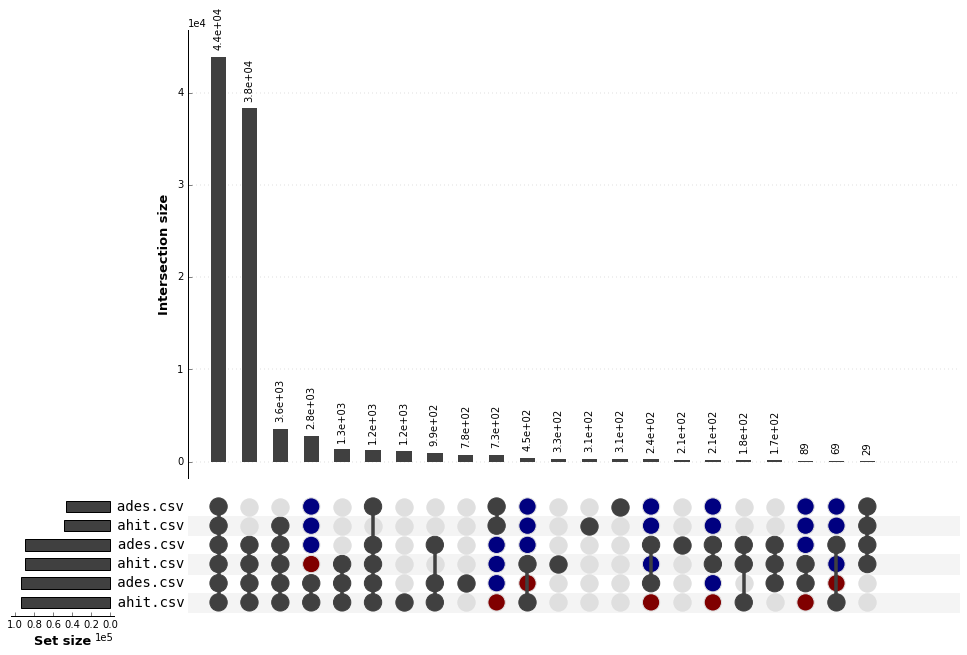

In [96]:
# Generate upset plot of the intersection of between data contained in column labeled 'gene'. 
pplot=pyu.plot(genus_dict, unique_keys = ['gene'], sort_by='size', inters_size_bounds=(25, 100000))
#pplot.set_size_inches(18.5, 10.5)
pplot['figure'].savefig('meta_annotation_comparison.png')
#.savefig('kaiju-smash-podar.pdf', dpi=100000000)